# **MNIST**

In [33]:
!pip install keras

In [34]:
!pip install utils

In [35]:
import matplotlib.pyplot as plt  # to display image
from keras.layers import Flatten,Dense # layer type,write layers
from keras.models import Sequential #which kind of model
from keras.datasets import mnist # which data
from keras import utils
#from keras.utils import to_categorical


In [36]:
# load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [37]:
x_train.shape

(60000, 28, 28)

(60000, 28, 28)
where 28,28 are pixel
60,000 data points, means 60k handwritten numbers.

In [38]:
y_test.shape

(10000,)

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

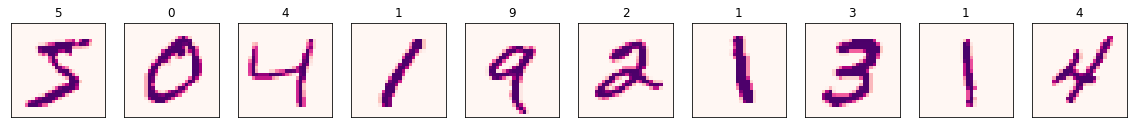

In [40]:
fig, axes = plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i],cmap='RdPu')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [41]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [42]:
y_train.shape

(60000, 10)

In [43]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))           # get the 1D data 
model.add(Dense(10,activation='sigmoid'))         # the layers are dense where nodes are 10 
model.add(Dense(5,activation='sigmoid'))          # nodes are 5
model.add(Dense(10,activation='softmax'))         # for output node we took softmax, more more than 1 class(multiclass)

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


Param:weights and baises we r training.


In [50]:
import keras
from keras.utils.vis_utils import plot_model

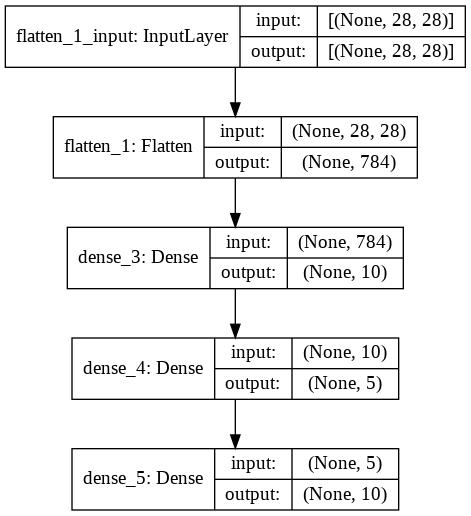

In [52]:
plot_model(model, show_shapes=True)

Above plot shows the flow.<br>
28*28=>784 flatten=>10nodes=>5=>10

In [54]:
# complie the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [55]:
# train the model
model.fit(x_train,y_train,epochs=20,
          validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7464 - acc: 0.4579 - val_loss: 1.3580 - val_acc: 0.5905
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1937 - acc: 0.5993 - val_loss: 1.0629 - val_acc: 0.6359
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0283 - acc: 0.6384 - val_loss: 0.9706 - val_acc: 0.6664
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9283 - acc: 0.6762 - val_loss: 0.8657 - val_acc: 0.6982
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8384 - acc: 0.7283 - val_loss: 0.8149 - val_acc: 0.7205
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8005 - acc: 0.7485 - val_loss: 0.7372 - val_acc: 0.7540
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7421 - acc: 0.7844 - val_loss: 0.7019 - val_acc: 0.8076
Epoch 8/20
1875/1875 [==============================] - 3s 1ms

Here it gives the details where our mail goal is to increase accuracy by decresing loss and val_loss.

<b>Q:What is None and 1875?</b><br>
=> We have data of 60000 so the data has been fed to model in batches.we did not give any batch size so it took None by default.<br>

<b>1875:</b><br>
Ther are 2 terms:<br>
1.Epoch<br>
2.steps per epoch:<br>

we have data 60000 and batch size is 32<br>
so when the data has been pass in 32 batches n come back that is basically means epoch.<br>

The stpes per epoch is how many times that 32 => happens means if we basically divide 60000/32=1875.So in 1 step how many times that happen called as stpes per epoch.<br>

In [58]:
# save the model
model.save('mnist_model.h5') # instaed of training the model, save it.

In [60]:
# we can visualize the model as well in netron.app,loads the moel and visualize.